In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [8]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt


In [9]:
# For image augmentation in training data
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize image pixel values to [0, 1]
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# For validation and testing data (just rescale)
test_valid_datagen = ImageDataGenerator(rescale=1./255)

# Load data using flow_from_directory
train_dir = '/kaggle/input/potholes-classification-2/train'  # Replace with your actual train directory
valid_dir = '/kaggle/input/potholes-classification-2/valid'  # Replace with your validation directory
test_dir = '/kaggle/input/potholes-classification-2/test'  # Replace with your test directory

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(299, 299),  # InceptionV3 input size
    batch_size=32,
    class_mode='binary'  # Use 'categorical' for multi-class classification
)

valid_generator = test_valid_datagen.flow_from_directory(
    valid_dir,
    target_size=(299, 299),
    batch_size=32,
    class_mode='binary'
)

test_generator = test_valid_datagen.flow_from_directory(
    test_dir,
    target_size=(299, 299),
    batch_size=32,
    class_mode='binary'
)


Found 14213 images belonging to 2 classes.
Found 2427 images belonging to 2 classes.
Found 1184 images belonging to 2 classes.


In [10]:
# Load InceptionV3 pre-trained model without top layers
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

# Freeze base model layers (we'll unfreeze later for fine-tuning)
for layer in base_model.layers:
    layer.trainable = False

# Add custom fully connected layers on top
x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)  # You can adjust the number of units here
x = Dropout(0.5)(x)  # Dropout to avoid overfitting
x = Dense(1, activation='sigmoid')(x)  # Sigmoid for binary classification

# Define the final model
model = Model(inputs=base_model.input, outputs=x)

# Compile the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2             │ (None, 299, 299, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_188 (Conv2D)       │ (None, 149, 149, 32)   │            864 │ input_layer_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_188   │ (None, 149, 149, 32)   │             96 │ conv2d_188[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_188            │ (None, 149, 149, 32)   │              0 │ batch_normalization_1… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_189 (Conv2D)       │ (None, 147, 147, 32)   │          9,216 │ activation_188[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_189   │ (None, 147, 147, 32)   │             96 │ conv2d_189[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_189            │ (None, 147, 147, 32)   │              0 │ batch_normalization_1… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_190 (Conv2D)       │ (None, 147, 147, 64)   │         18,432 │ activation_189[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_190   │ (None, 147, 147, 64)   │            192 │ conv2d_190[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_190            │ (None, 147, 147, 64)   │              0 │ batch_normalization_1… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_8           │ (None, 73, 73, 64)     │              0 │ activation_190[0][0]   │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_191 (Conv2D)       │ (None, 73, 73, 80)     │          5,120 │ max_pooling2d_8[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_191   │ (None, 73, 73, 80)     │            240 │ conv2d_191[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_191            │ (None, 73, 73, 80)     │              0 │ batch_normalization_1… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_192 (Conv2D)  

 Total params: 55,357,729 (211.17 MB)

 Trainable params: 33,554,945 (128.00 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

In [11]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=10,  # Start with 10 epochs and adjust if needed
    validation_data=valid_generator,
    validation_steps=valid_generator.samples // valid_generator.batch_size
)


Epoch 1/10


I0000 00:00:1751807207.735948     120 service.cc:148] XLA service 0x7fd264014750 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1751807207.737028     120 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1751807207.737049     120 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1751807209.678568     120 cuda_dnn.cc:529] Loaded cuDNN version 90300


  1/444 ━━━━━━━━━━━━━━━━━━━━ 3:02:53 25s/step - accuracy: 0.4688 - loss: 0.8522

I0000 00:00:1751807220.021886     120 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


444/444 ━━━━━━━━━━━━━━━━━━━━ 441s 940ms/step - accuracy: 0.8354 - loss: 2.8324 - val_accuracy: 0.9312 - val_loss: 0.1792
Epoch 2/10
  1/444 ━━━━━━━━━━━━━━━━━━━━ 56s 128ms/step - accuracy: 0.9062 - loss: 0.3415

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


444/444 ━━━━━━━━━━━━━━━━━━━━ 14s 32ms/step - accuracy: 0.9062 - loss: 0.3415 - val_accuracy: 0.9304 - val_loss: 0.1802
Epoch 3/10
444/444 ━━━━━━━━━━━━━━━━━━━━ 317s 713ms/step - accuracy: 0.8910 - loss: 0.2904 - val_accuracy: 0.9175 - val_loss: 0.2026
Epoch 4/10
444/444 ━━━━━━━━━━━━━━━━━━━━ 17s 37ms/step - accuracy: 0.8438 - loss: 0.3871 - val_accuracy: 0.9167 - val_loss: 0.2039
Epoch 5/10
444/444 ━━━━━━━━━━━━━━━━━━━━ 320s 720ms/step - accuracy: 0.8855 - loss: 0.2620 - val_accuracy: 0.9337 - val_loss: 0.1571
Epoch 6/10
444/444 ━━━━━━━━━━━━━━━━━━━━ 17s 37ms/step - accuracy: 0.7812 - loss: 0.2495 - val_accuracy: 0.9333 - val_loss: 0.1554
Epoch 7/10
444/444 ━━━━━━━━━━━━━━━━━━━━ 325s 733ms/step - accuracy: 0.8937 - loss: 0.2520 - val_accuracy: 0.9342 - val_loss: 0.1560
Epoch 8/10
444/444 ━━━━━━━━━━━━━━━━━━━━ 15s 33ms/step - accuracy: 0.8750 - loss: 0.1782 - val_accuracy: 0.9354 - val_loss: 0.1531
Epoch 9/10
444/444 ━━━━━━━━━━━━━━━━━━━━ 316s 712ms/step - accuracy: 0.9056 - loss: 0.2285 - val

In [12]:
# Unfreeze the last few layers of the base model for fine-tuning
for layer in base_model.layers[-10:]:  # Fine-tune the last 10 layers (adjust as needed)
    layer.trainable = True

# Recompile the model after unfreezing layers
model.compile(optimizer=Adam(learning_rate=1e-5), loss='binary_crossentropy', metrics=['accuracy'])


# Continue training the model (fine-tuning)
history_fine = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=10,  # Fine-tune for additional 10 epochs
    validation_data=valid_generator,
    validation_steps=valid_generator.samples // valid_generator.batch_size
)


Epoch 1/10
444/444 ━━━━━━━━━━━━━━━━━━━━ 348s 747ms/step - accuracy: 0.9048 - loss: 0.2165 - val_accuracy: 0.9417 - val_loss: 0.1387
Epoch 2/10
444/444 ━━━━━━━━━━━━━━━━━━━━ 14s 32ms/step - accuracy: 0.7812 - loss: 0.2577 - val_accuracy: 0.9417 - val_loss: 0.1390
Epoch 3/10
444/444 ━━━━━━━━━━━━━━━━━━━━ 321s 723ms/step - accuracy: 0.9134 - loss: 0.2034 - val_accuracy: 0.9425 - val_loss: 0.1351
Epoch 4/10
444/444 ━━━━━━━━━━━━━━━━━━━━ 13s 28ms/step - accuracy: 0.8750 - loss: 0.3177 - val_accuracy: 0.9425 - val_loss: 0.1351
Epoch 5/10
444/444 ━━━━━━━━━━━━━━━━━━━━ 315s 709ms/step - accuracy: 0.9147 - loss: 0.1915 - val_accuracy: 0.9413 - val_loss: 0.1380
Epoch 6/10
444/444 ━━━━━━━━━━━━━━━━━━━━ 14s 32ms/step - accuracy: 0.9375 - loss: 0.1810 - val_accuracy: 0.9413 - val_loss: 0.1391
Epoch 7/10
444/444 ━━━━━━━━━━━━━━━━━━━━ 315s 709ms/step - accuracy: 0.9210 - loss: 0.1875 - val_accuracy: 0.9429 - val_loss: 0.1375
Epoch 8/10
444/444 ━━━━━━━━━━━━━━━━━━━━ 14s 32ms/step - accuracy: 0.9375 - loss: 0

In [13]:
# Evaluate on test data
test_loss, test_acc = model.evaluate(test_generator, steps=test_generator.samples // test_generator.batch_size)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_acc}")


37/37 ━━━━━━━━━━━━━━━━━━━━ 17s 465ms/step - accuracy: 0.9324 - loss: 0.1546
Test Loss: 0.1398514062166214
Test Accuracy: 0.9375


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


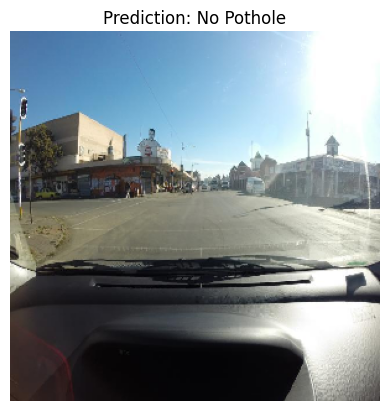

In [37]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Load a single image for prediction
img_path = '/kaggle/input/potholes-classification-2/test/Not Pothole/G0028049_JPG_jpg.rf.35c0a2080609bf0f12f8ba2abdf21c5e.jpg'  # Replace with your image path
img = image.load_img(img_path, target_size=(299, 299))  # InceptionV3 expects 299x299 images

# Convert the image to a numpy array
img_array = image.img_to_array(img)

# Expand dimensions to match the batch size (i.e., adding a batch dimension)
img_array = np.expand_dims(img_array, axis=0)

# Rescale the image (as done in the training phase)
img_array = img_array / 255.0

# Make prediction
prediction = model.predict(img_array)

# Show the image
plt.imshow(img)
plt.axis('off')  # Turn off axis
plt.title("Prediction: Pothole" if prediction[0] > 0.5 else "Prediction: No Pothole")
plt.show()

In [18]:
# Ground truth for the image (True Label)
true_label = 1  # If the image is a pothole, set it to 1, otherwise 0

# Compare predicted label with the true label
prediction = model.predict(img_array)
predicted_label = 1 if prediction[0] > 0.5 else 0  # If prediction > 0.5, it's Pothole (1), otherwise No Pothole (0)

# Check if the prediction is correct
correct = (predicted_label == true_label)
accuracy = (correct * 100)  # 100% if correct, 0% if incorrect

print(f"Prediction: {'Pothole' if predicted_label == 1 else 'No Pothole'}")
print(f"Accuracy: {accuracy}%")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Prediction: Pothole
Accuracy: 100%


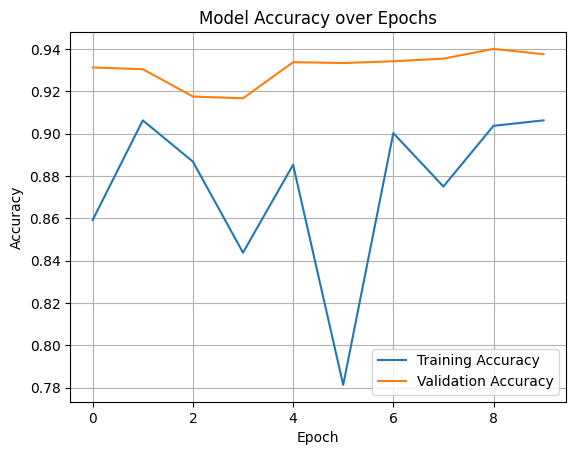

In [22]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')

plt.title('Model Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [23]:
from tensorflow.keras.callbacks import Callback

class TestAccuracyCallback(Callback):
    def __init__(self, test_generator):
        super().__init__()
        self.test_generator = test_generator
        self.test_accuracies = []

    def on_epoch_end(self, epoch, logs=None):
        loss, acc = self.model.evaluate(
            self.test_generator,
            steps=self.test_generator.samples // self.test_generator.batch_size,
            verbose=0
        )
        self.test_accuracies.append(acc)
        print(f"\nTest accuracy after epoch {epoch+1}: {acc:.4f}")

In [24]:
# Initialize the callback
test_callback = TestAccuracyCallback(test_generator)

# Train the model with the callback
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=10,
    validation_data=valid_generator,
    validation_steps=valid_generator.samples // valid_generator.batch_size,
    callbacks=[test_callback]
)

Epoch 1/10
444/444 ━━━━━━━━━━━━━━━━━━━━ 0s 702ms/step - accuracy: 0.9197 - loss: 0.1810
Test accuracy after epoch 1: 0.9375
444/444 ━━━━━━━━━━━━━━━━━━━━ 337s 759ms/step - accuracy: 0.9197 - loss: 0.1810 - val_accuracy: 0.9446 - val_loss: 0.1343
Epoch 2/10
  1/444 ━━━━━━━━━━━━━━━━━━━━ 55s 126ms/step - accuracy: 0.9062 - loss: 0.1910
Test accuracy after epoch 2: 0.9375
444/444 ━━━━━━━━━━━━━━━━━━━━ 21s 48ms/step - accuracy: 0.9062 - loss: 0.1910 - val_accuracy: 0.9446 - val_loss: 0.1353
Epoch 3/10
444/444 ━━━━━━━━━━━━━━━━━━━━ 0s 667ms/step - accuracy: 0.9220 - loss: 0.1884
Test accuracy after epoch 3: 0.9383
444/444 ━━━━━━━━━━━━━━━━━━━━ 319s 718ms/step - accuracy: 0.9220 - loss: 0.1884 - val_accuracy: 0.9454 - val_loss: 0.1359
Epoch 4/10
  1/444 ━━━━━━━━━━━━━━━━━━━━ 55s 125ms/step - accuracy: 0.9375 - loss: 0.2032
Test accuracy after epoch 4: 0.9383
444/444 ━━━━━━━━━━━━━━━━━━━━ 20s 46ms/step - accuracy: 0.9375 - loss: 0.2032 - val_accuracy: 0.9446 - val_loss: 0.1371
Epoch 5/10
444/444 ━━━

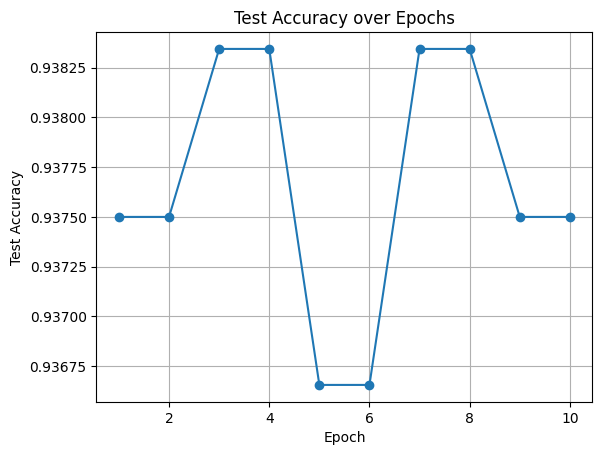

In [27]:
# Plot test accuracy per epoch
plt.plot(range(1, len(test_callback.test_accuracies) + 1), test_callback.test_accuracies, marker='o')
plt.title('Test Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Test Accuracy')
plt.grid(True)
plt.show()

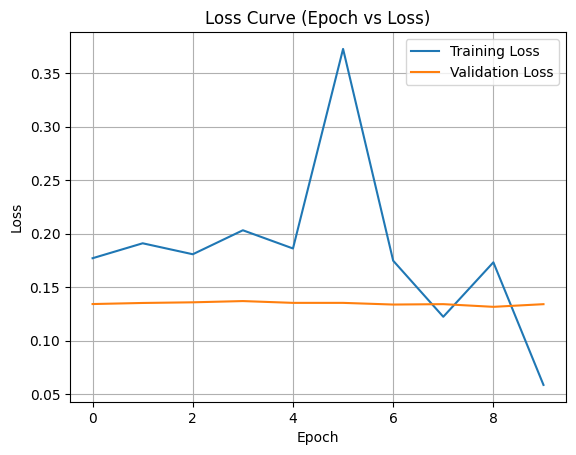

In [36]:
import matplotlib.pyplot as plt

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')

plt.title('Loss Curve (Epoch vs Loss)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [30]:
from sklearn.metrics import confusion_matrix
import numpy as np

# Generate predictions for the training dataset
train_labels = []
train_predictions = []

# Loop through the training dataset and collect predictions and true labels
for i in range(train_generator.samples // train_generator.batch_size):
    images, labels = next(train_generator)  # Get the next batch
    predictions = model.predict(images)  # Predict labels
    train_labels.extend(labels)  # Add true labels to list
    train_predictions.extend(np.round(predictions))  # Add predicted labels to list

# Convert lists to numpy arrays
train_labels = np.array(train_labels)
train_predictions = np.array(train_predictions)

# Generate confusion matrix
cm_train = confusion_matrix(train_labels, train_predictions)
print("Confusion Matrix for Training Data:")
print(cm_train)


1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 

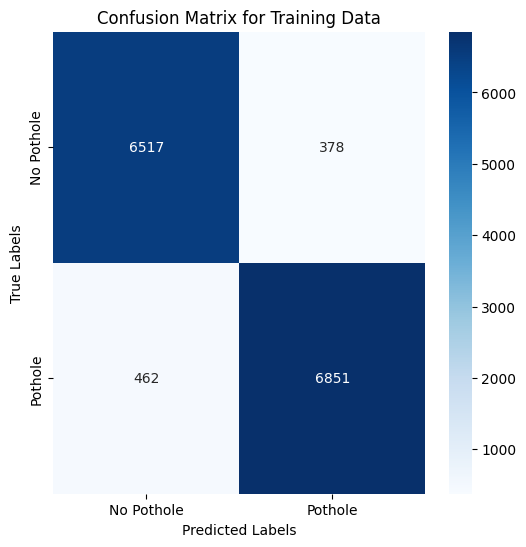

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate confusion matrix for the training data
cm_train = confusion_matrix(train_labels, train_predictions)

# Plot the confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', xticklabels=['No Pothole', 'Pothole'], yticklabels=['No Pothole', 'Pothole'])
plt.title('Confusion Matrix for Training Data')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


In [32]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Assuming train_labels and train_predictions are already defined (from previous steps)

# Calculate Accuracy
accuracy = accuracy_score(train_labels, train_predictions)
print(f"Accuracy: {accuracy:.4f}")

# Calculate Precision
precision = precision_score(train_labels, train_predictions)
print(f"Precision: {precision:.4f}")

# Calculate Recall
recall = recall_score(train_labels, train_predictions)
print(f"Recall: {recall:.4f}")

# Calculate F1 Score
f1 = f1_score(train_labels, train_predictions)
print(f"F1 Score: {f1:.4f}")


Accuracy: 0.9409
Precision: 0.9477
Recall: 0.9368
F1 Score: 0.9422


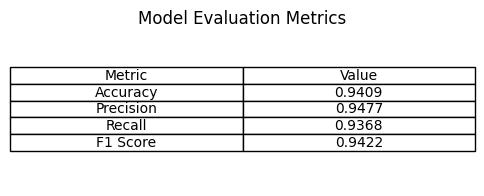

In [33]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Calculate the metrics
accuracy = accuracy_score(train_labels, train_predictions)
precision = precision_score(train_labels, train_predictions)
recall = recall_score(train_labels, train_predictions)
f1 = f1_score(train_labels, train_predictions)

# Create the data for the table
metrics = [
    ['Accuracy', f'{accuracy:.4f}'],
    ['Precision', f'{precision:.4f}'],
    ['Recall', f'{recall:.4f}'],
    ['F1 Score', f'{f1:.4f}']
]

# Plotting the table
fig, ax = plt.subplots(figsize=(6, 2))  # Set size of the figure
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=metrics, colLabels=['Metric', 'Value'], loc='center', cellLoc='center')

# Display the table
plt.title("Model Evaluation Metrics")
plt.show()


In [34]:
# Save the model
model.save('pothole_classification_model.h5')  # Save as a .h5 file

print("Model saved successfully!")


Model saved successfully!


In [35]:
import os
print("Current working directory:", os.getcwd())


Current working directory: /kaggle/working
